In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
stock_symbol = ['RELIANCE.NS', 'TCS.NS', 'HINDUNILVR.NS']
stock_name = ['RELIANCE INDUSTRIES (INR)', 'Tata Consultancy Services (INR)', 'Hindustan Unilever (INR)']

Stock: RELIANCE INDUSTRIES (INR)
Mean Squared Error: 280.96804712384716
Best Alpha (Lambda) chosen by LassoCV: 0.7267087064615134


Stock: Tata Consultancy Services (INR)
Mean Squared Error: 405.77946834317447
Best Alpha (Lambda) chosen by LassoCV: 0.9453600134710513


Stock: Hindustan Unilever (INR)
Mean Squared Error: 210.92379450908402
Best Alpha (Lambda) chosen by LassoCV: 0.7640685695067934




RELIANCE INDUSTRIES (INR)                            \
                        Contribution Relative Contribution (%)   
WMA                     1.646997e+09                 72.377679   
DEMA                    3.629869e+08                 15.951551   
ZLEMA                   2.615260e+08                 11.492826   
RSI                     3.178149e+06                  0.139665   
SMI                     4.235570e+05                  0.018613   
KST                     2.295261e+05                  0.010087   
MFI                     2.130125e+05                  0.009361   
BollingerB              3.945094e+03                  0.000173   
AR                      9.654255e+02                  0.000042   
ROC                     7.099070e+01                  0.000003   
VHF                     0.000000e+00                  0.000000   
ChaikinAD               0.000000e+00                  0.000000   
OBV                     0.000000e+00                  0.000000   
ADX                     0.000000e+00                  0.000000   
HMA                     0.000000e+00                  0.000000   
EVWMA                   0.000000e+00                  0.000000   
ATR                     0.000000e+00                  0.000000   
SMA                     0.000000e+00                  0.000000   
MACD                    0.000000e+00                  0.000000   
CCI                     0.000000e+00                  0.000000   
EMA                     0.000000e+00                  0.000000   

           Tata Consultancy Services (INR)                            \
                              Contribution Relative Contribution (%)   
WMA                           3.840021e+09              5.612767e-01   
DEMA                          5.549432e+08              8.111328e-02   
ZLEMA                         3.612843e+08              5.280712e-02   
RSI                           4.487582e+06              6.559276e-04   
SMI                           4.348497e+05              6.355982e-05   
KST                           2.431549e+05              3.554075e-05   
MFI                           3.094207e+05              4.522648e-05   
BollingerB                    3.497893e+03              5.112697e-07   
AR                            2.489292e+03              3.638475e-07   
ROC                           4.585213e+01              6.701978e-09   
VHF                           1.325137e+02              1.936886e-08   
ChaikinAD                     0.000000e+00              0.000000e+00   
OBV                           6.793965e+11              9.930400e+01   
ADX                           1.855371e+04              2.711904e-06   
HMA                           0.000000e+00              0.000000e+00   
EVWMA                         0.000000e+00              0.000000e+00   
ATR                           0.000000e+00              0.000000e+00   
SMA                           0.000000e+00              0.000000e+00   
MACD                          0.000000e+00              0.000000e+00   
CCI                           0.000000e+00              0.000000e+00   
EMA                           0.000000e+00              0.000000e+00   

           Hindustan Unilever (INR)                            
                       Contribution Relative Contribution (%)  
WMA                    2.291203e+09              7.841545e+01  
DEMA                   3.557299e+08              1.217470e+01  
ZLEMA                  2.707108e+08              9.264964e+00  
RSI                    2.768112e+06              9.473745e-02  
SMI                    0.000000e+00              0.000000e+00  
KST                    4.217777e+05              1.443516e-02  
MFI                    2.710350e+05              9.276059e-03  
BollingerB             3.877769e+03              1.327150e-04  
AR                     5.355538e+03              1.832910e-04  
ROC                    2.718286e+01              9.303217e-07  
VHF                    0.000000e+00              0.000000e+00  
Cha

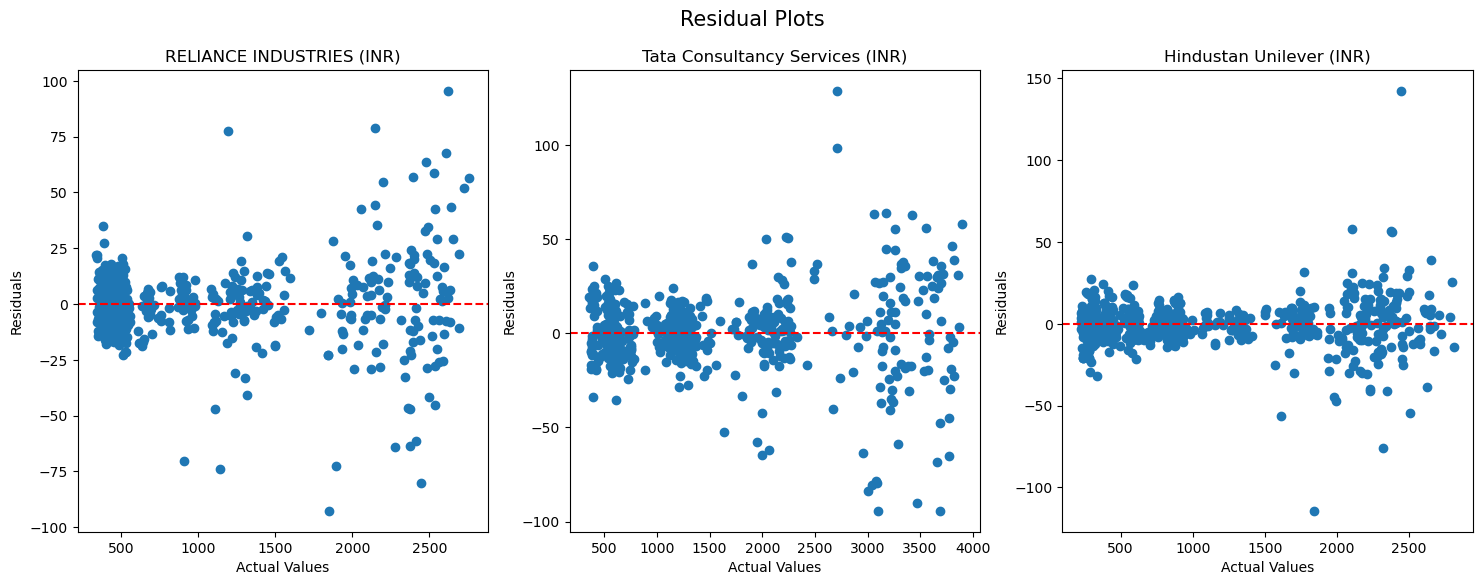

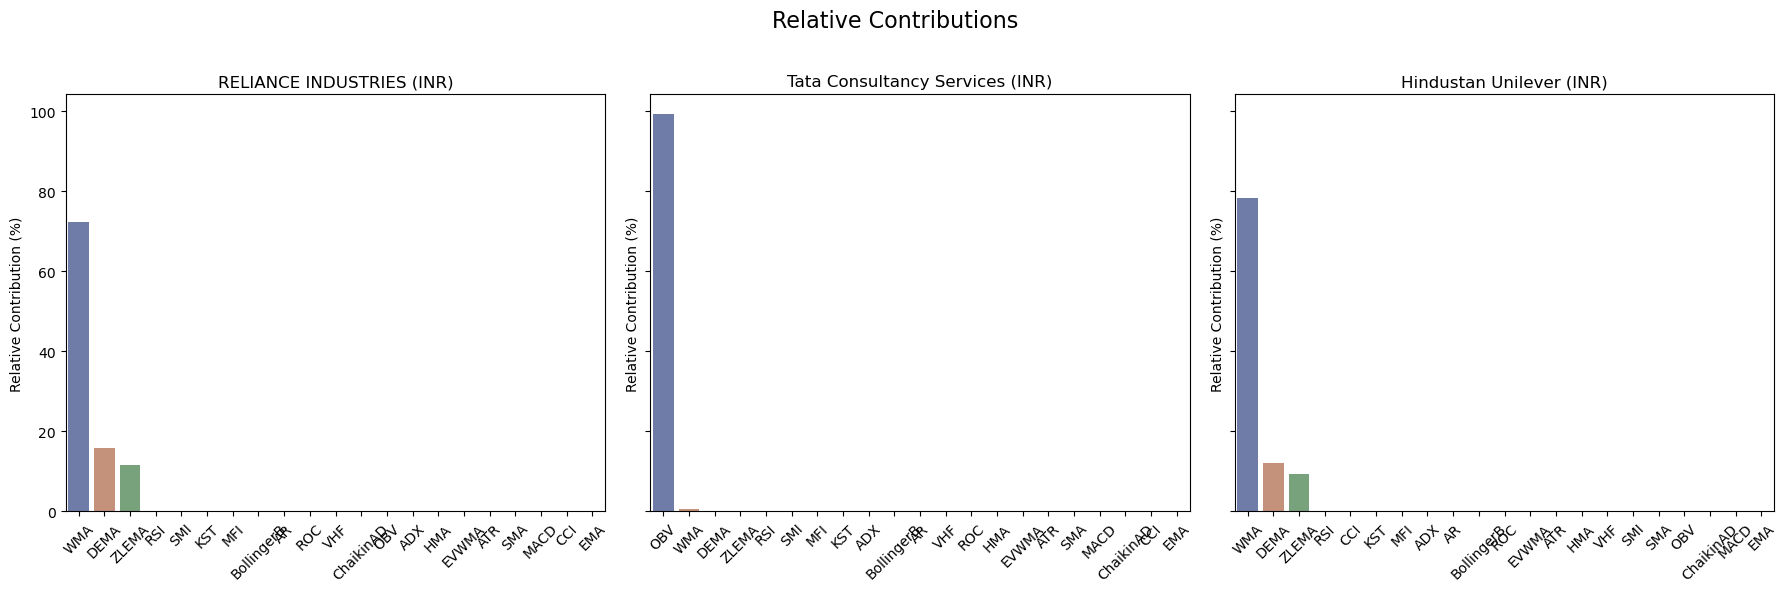

In [15]:
# Lists to store dataframes for relative contribution for each stock
relative_contributions_list = []

# Initialize a figure for the residuals subplot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Residual Plots', fontsize=15)

for idx, symbol in enumerate(stock_symbol):
    # Read and preprocess the data
    df = pd.read_csv(f'{symbol}_technical_data.csv', index_col=0)
    df.drop(['Symbol', 'Adj Close', 'High', 'Low', 'Open', 'Volume', 'pct_ch'], axis=1, inplace=True)
    df = df.dropna()

    # Define features and target
    X = df.drop('Close', axis=1)
    y = df['Close']

    # Normalize the data
    scaler_X = StandardScaler().fit(X)
    X_scaled = scaler_X.transform(X)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Model training
    model = LassoCV(cv=5).fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Display MSE and Best Alpha
    print(f"Stock: {stock_name[idx]}")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("Best Alpha (Lambda) chosen by LassoCV:", model.alpha_)
    print("\n")

    # Calculate the contributions
    coefficients = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': model.coef_
    })

    df_coeff = coefficients[coefficients['Feature'].isin(['ADX', 'ATR', 'BollingerB', 'CCI', 'KST', 'MACD', 'RSI', 'WMA', 'DEMA', 'SMA', 'EMA', 'EVWMA', 'ZLEMA', 'HMA', 'VHF', 'SMI', 'AR', 'OBV', 'ChaikinAD', 'MFI', 'ROC'])]
    df = df[df_coeff['Feature']]
    individual_contributions = df.multiply(df_coeff['Coefficient'].values, axis=1)
    
    abs_contribution = pd.DataFrame(np.abs(individual_contributions).sum(axis=0), columns=['Contribution'])
    abs_contribution['Relative Contribution (%)'] = abs_contribution['Contribution'] / abs_contribution['Contribution'].sum() * 100
    relative_contributions_list.append(abs_contribution.sort_values(by='Relative Contribution (%)', ascending=False))

    # Residual plot
    residuals = y_test - y_pred
    axes[idx].scatter(y_test, residuals)
    axes[idx].axhline(0, color='red', linestyle='--')
    axes[idx].set_title(stock_name[idx])
    axes[idx].set_xlabel('Actual Values')
    axes[idx].set_ylabel('Residuals')

# Display relative contributions in a dataframe format and plot
resultant_df = pd.concat(relative_contributions_list, axis=1, keys=stock_name)
display(resultant_df)

# Nested Bar Plot for Relative Contributions
fig, axarr = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('Relative Contributions', fontsize=16)

for idx, name in enumerate(stock_name):
    sns.barplot(
        data=relative_contributions_list[idx].reset_index(),
        x="index", y="Relative Contribution (%)",
        palette="dark", alpha=.6, ax=axarr[idx])
    
    axarr[idx].set_title(name)
    axarr[idx].set_ylabel("Relative Contribution (%)")
    axarr[idx].tick_params(axis='x', rotation=45)
    axarr[idx].set_xlabel("")
    
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()